**Aditya** **Anand**(21d070007) / **Mrudul Jambhulkar**(21d070044) - Assignment 3

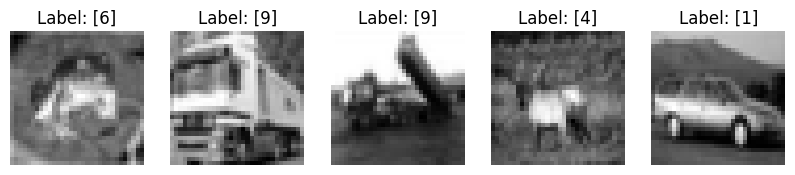

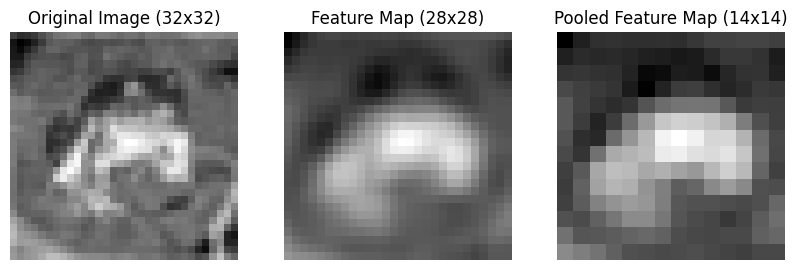

1/1 [==============================] - 0s 281ms/step


<ipython-input-3-d6af36efced5>:187: RuntimeWarning: invalid value encountered in divide
  x /= x.std()  # Divide by standard deviation for scaling


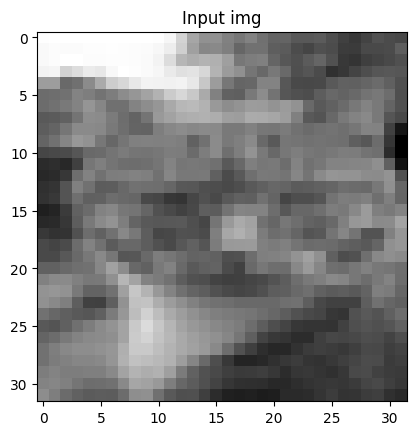

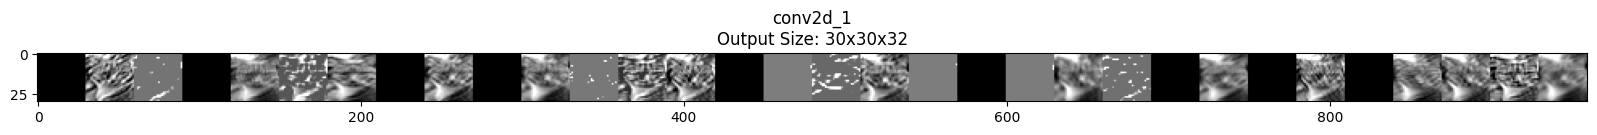

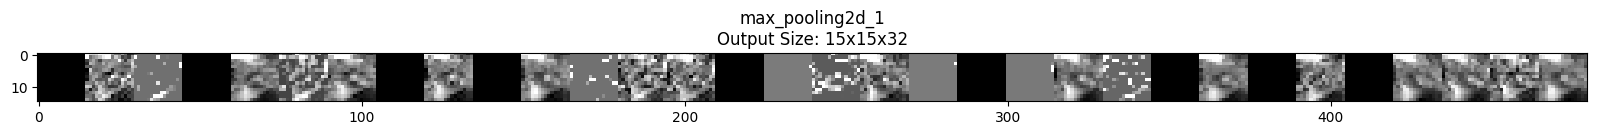

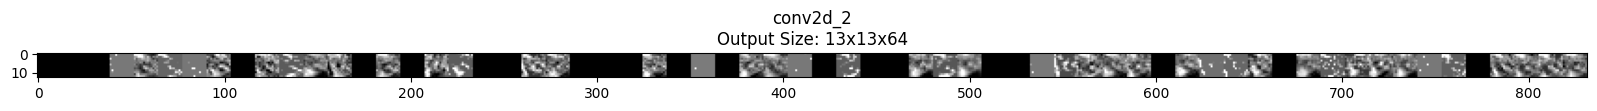

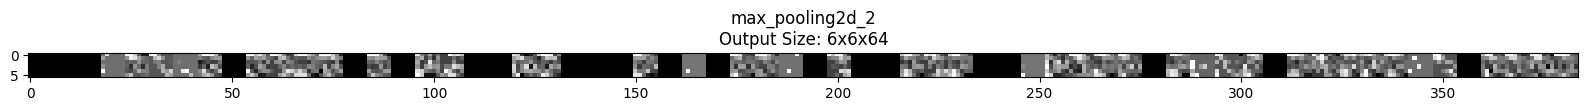

Epoch 1/5
391/391 [==============================] - 72s 180ms/step - loss: 1.8379 - accuracy: 0.3310 - val_loss: 1.5861 - val_accuracy: 0.4384
Epoch 2/5
391/391 [==============================] - 69s 177ms/step - loss: 1.4657 - accuracy: 0.4873 - val_loss: 1.3488 - val_accuracy: 0.5200
Epoch 3/5
391/391 [==============================] - 67s 172ms/step - loss: 1.3001 - accuracy: 0.5500 - val_loss: 1.2864 - val_accuracy: 0.5517
Epoch 4/5
391/391 [==============================] - 62s 160ms/step - loss: 1.1979 - accuracy: 0.5853 - val_loss: 1.1706 - val_accuracy: 0.5933
Epoch 5/5
391/391 [==============================] - 62s 158ms/step - loss: 1.1157 - accuracy: 0.6123 - val_loss: 1.1201 - val_accuracy: 0.6155


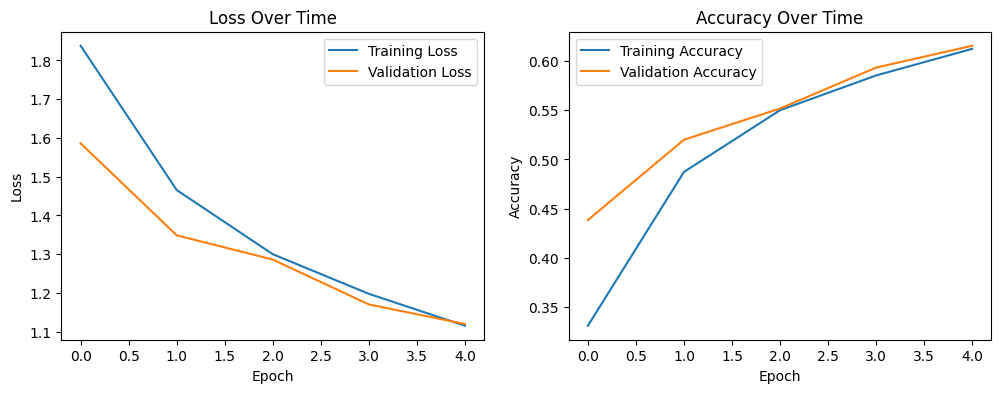

313/313 [==============================] - 8s 24ms/step - loss: 1.1201 - accuracy: 0.6155
Test Loss: 1.1201
Test Accuracy: 61.55%
313/313 [==============================] - 6s 19ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63      1000
           1       0.79      0.70      0.74      1000
           2       0.47      0.50      0.49      1000
           3       0.43      0.38      0.40      1000
           4       0.51      0.61      0.56      1000
           5       0.49      0.60      0.54      1000
           6       0.65      0.73      0.69      1000
           7       0.68      0.64      0.66      1000
           8       0.76      0.71      0.73      1000
           9       0.75      0.73      0.74      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

Confusion Matrix:
 [[554  21 13

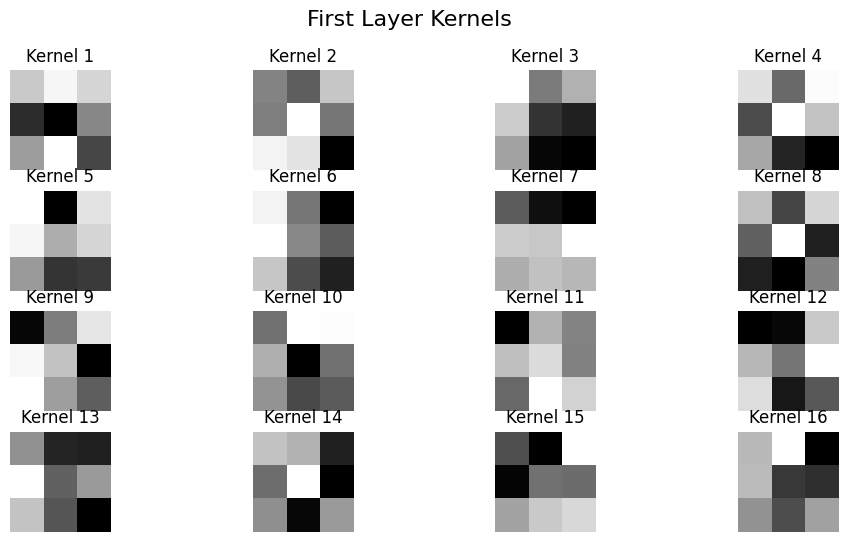

1/1 [==============================] - 0s 149ms/step


<ipython-input-3-d6af36efced5>:310: RuntimeWarning: invalid value encountered in divide
  feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling


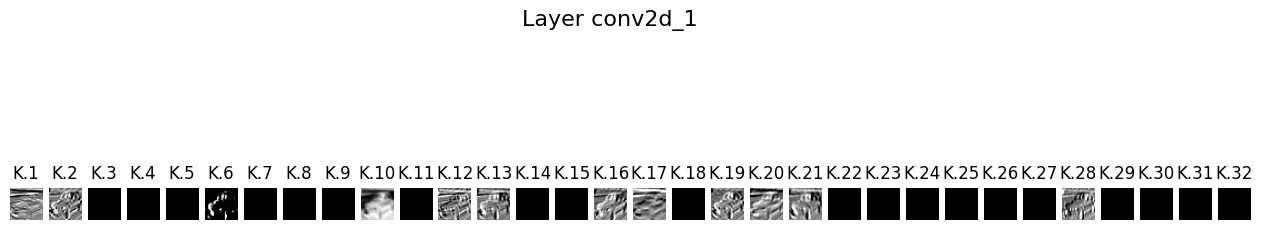

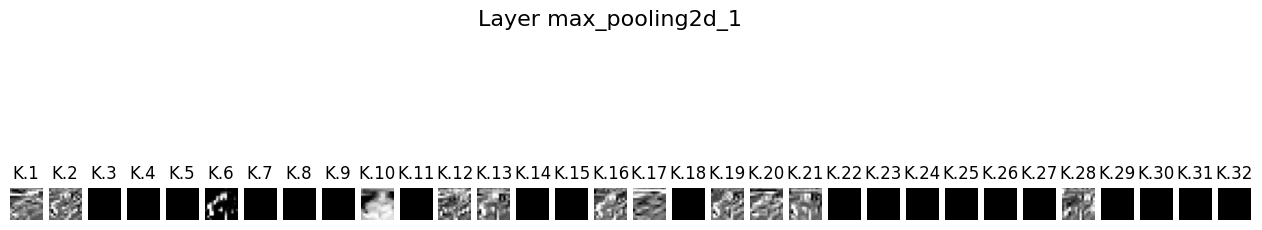

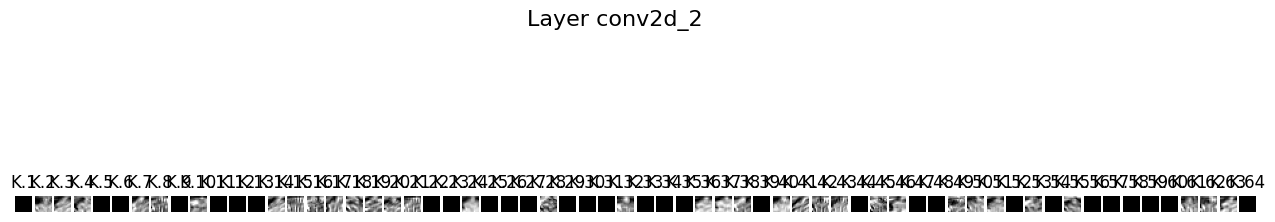

In [3]:

# "e. Create a copy of this notebook and now use the CIFAR10 dataset and modify the template (keep the basic model same as 'Sequential', but can make other changes) as necessary to perform classification on this dataset. Show that the trained model is able to classify the objects from the given 'Train' set. Does it work for your own image (not necessarily in the dataset) ?"

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

(x_train_rgb, y_train), (x_test_rgb, y_test) = cifar10.load_data()


def rgb_to_gray(images):
    gray_images = np.dot(images, [0.2989, 0.5870, 0.1140])
    return gray_images

# Convert train and test sets to grayscale
x_train = rgb_to_gray(x_train_rgb)
x_test = rgb_to_gray(x_test_rgb)

# Ensure the shape of the grayscale images is compatible with the CNN model
# For example, for a CNN model expecting grayscale images of shape (32, 32, 1):
# Reshape grayscale images to add the channel dimension




#Load the CIFAR10 dataset and preprocess it
x_train = x_train.reshape((-1, 32, 32, 1))
x_test = x_test.reshape((-1, 32, 32, 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0




#Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()






image = x_train[0]
#Create a random 5x5 receptive field
receptive_field = np.random.rand(5, 5)

feature_map = np.zeros((28, 28))  # Output feature map size after convolution (28-5+1)x(28-5+1)

for i in range(28):
    for j in range(28):
        feature_map[i, j] = np.sum(image[i:i+5, j:j+5] * receptive_field) #Perform convolution

#Perform max-pooling with a 2x2 neighborhood
pooled_feature_map = np.zeros((14, 14))

for i in range(0, 28, 2):
    for j in range(0, 28, 2):
        pooled_feature_map[i//2, j//2] = np.max(feature_map[i:i+2, j:j+2])

#Visualize the image, feature map, and pooled feature map
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image (32x32)")
plt.axis('off')

plt.subplot(132)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (28x28)")
plt.axis('off')

plt.subplot(133)
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Pooled Feature Map (14x14)")
plt.axis('off')

plt.show()


import tensorflow as tf
#Select a random CIFAR10 image from the training set
random_index = np.random.randint(0, len(x_train))
img = x_train[random_index]
plt.title('Input img')
plt.imshow(img,cmap='gray')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Assuming grayscale images with shape (32, 32, 1)
model = Sequential()
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

#Create a simple CNN model with two convolutional layers and pooling
# model = Sequential()
# model.add(Conv2D(16, (5, 5), activation='relu',padding='same', input_shape=(32, 32, 3))) #16 kernels, 5x5 each
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
# model.add(BatchNormalization())
# #model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
# #model.add(BatchNormalization())                          #32 kernels, 5x5 each
# model.add(MaxPooling2D((2, 2)))

# ####MODIFICATION: ADDING ANOTHER CONV2D LAYER #################
# model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
# model.add(BatchNormalization())
# #model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
# #model.add(BatchNormalization())  #64 kernels, 3x3 each
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
# model.add(BatchNormalization())
# #model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
# #model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model = Sequential()
# model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 1))) #16 kernels, 5x5 each
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (5, 5), activation='relu'))                          #32 kernels, 5x5 each
# model.add(MaxPooling2D((2, 2)))
# # model.add(Conv2D(128, (5, 5), activation='relu'))                          #128 kernels, 5x5 each
# # model.add(MaxPooling2D((2, 2)))
# # model.add(Conv2D(254, (5, 5), activation='relu'))                          #254 kernels, 5x5 each
# # model.add(MaxPooling2D((2, 2)))


img = img.reshape((32, 32, 1))  # Add the channel dimension
img = img / 255.0  # Normalize the pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add the batch dimension

#Create a model to visualize feature maps
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for the example image
feature_maps = visualization_model.predict(img)

# Visualize the feature maps
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

# Iterate through each layer and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Get the size of each feature map (assuming they are square)
    size = feature_map.shape[1]

    # Create an empty grid to display all feature maps in this layer
    display_grid = np.zeros((size, size * n_features))



    # Iterate through each feature map in the current layer
    for i in range(n_features):
        # Extract the current feature map
        x = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        x -= x.mean()  # Subtract the mean value to center around 0
        x /= x.std()  # Divide by standard deviation for scaling
        x *= 64  # Scale values for better visibility
        x += 128  # Shift values to be within the [0, 255] range
        x = np.clip(x, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Add the current feature map to the display grid
        display_grid[:, i * size: (i + 1) * size] = x

    # Set the scale for displaying the grid
    scale = 20. / n_features

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(scale * n_features, scale))

    # Set the title for this layer, along with input and output size
    plt.title(f'{layer_name}\nOutput Size: {size}x{size}x{n_features}')

    # Remove grid lines for a cleaner visualization
    plt.grid(False)

    # Display the feature maps in the current layer using the viridis colormap
    plt.imshow(display_grid, aspect='auto', cmap='gray')

# Show all the visualizations
plt.show()


#Flatten the feature maps and add fully connected dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#encode the labels(one-hot)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

#Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

#Generate predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))


first_layer_weights = model.layers[0].get_weights()[0]

#Visualize the weights
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Kernel {i + 1}')

plt.suptitle('First Layer Kernels', fontsize=16)
plt.show()

#Select a random CIFAR10 image from the test set
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

#Preprocess the test image for visualization
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

#Extract the parameters from the trained model and create a visualization model with these
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

#Get the feature maps for the test image
feature_maps = visualization_model.predict(test_image)

#Visualize the feature maps at different layers
# , 'max_pooling2d_2','conv2d_3', 'max_pooling2d_3','conv2d_4', 'max_pooling2d_4','conv2d_5', 'max_pooling2d_5'
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2']

for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(16, 4))

    # Visualize feature maps for each kernel in the current layer
    for i in range(n_features):
        feature_map_i = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        feature_map_i -= feature_map_i.mean()  # Subtract the mean value to center around 0
        feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling
        feature_map_i *= 64  # Scale values for better visibility
        feature_map_i += 128  # Shift values to be within the [0, 255] range
        feature_map_i = np.clip(feature_map_i, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Create subplots for each feature map
        plt.subplot(1, n_features, i + 1)
        plt.imshow(feature_map_i, cmap='gray')
        plt.axis('off')
        plt.title(f'K.{i + 1}')

    plt.suptitle(f'Layer {layer_name}', fontsize=16)
    plt.show()

# To Do - Based on the above outputs, comment on the use of the various layers
# of the CNN model. What features do they capture ? Why ?
#
# To Do - take a specific image from the 'Train' set and
# demonstrate that it was classificed correctly.


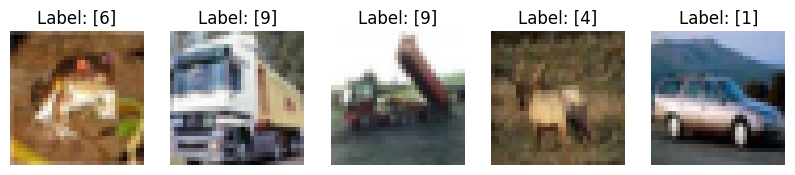

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


#Load the CIFAR10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape((-1, 32, 32, 3))
x_test = x_test.reshape((-1, 32, 32, 3))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


#Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
im = x_test[5]
im = np.expand_dims(im, axis=0)
y_pred = model.predict(im)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print("actual value" , y_test_labels[7])
print("predicted value", y_pred_labels)

1/1 [==============================] - 0s 26ms/step
actual value 6
predicted value [6]


In [6]:
#Now the aim is to take an image of a car and classify it correctly so first we will convert it into a grascale image of size 32x32 and then into a Numpy array


from PIL import Image
import numpy as np

# Open an RGB image using PIL
rgb_image = Image.open('car.jpg')
# Resize the image to 32x32 pixels (maintaining aspect ratio)
resized_image = rgb_image.resize((32, 32))

# Convert the resized RGB image to grayscale
grayscale_image = resized_image.convert('L')

# Convert the grayscale image to a NumPy array
grayscale_array = np.array(grayscale_image)

# Reshape the grayscale array to (32, 32, 1)
grayscale_array_reshaped = grayscale_array.reshape(32, 32, 1)

# Ensure pixel values are in the range [0, 1]
grayscale_array_reshaped = grayscale_array_reshaped.astype('float32') / 255.0

# Now, grayscale_array_reshaped contains the grayscale image in the format (32, 32, 1)

In [12]:

img=img.reshape((-1, 32, 32, 1))
img=img.astype('float32') / 255.0
a=model.predict(img)
np.argmax(a)

1/1 [==============================] - 0s 25ms/step


3